Time Series Analysis of Gold Market

Data is taken from 2014 to 2022

In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime

In [ ]:
dataset = pd.read_csv('Gold Price.csv',index_col="Date",parse_dates=True)

In [ ]:
dataset_train = pd.read_csv('Gold Price.csv')  
training_set = dataset_train.iloc[:, 1:2].values  

In [ ]:
training_set

array([[29542],
       [29975],
       [29727],
       ...,
       [47933],
       [47888],
       [47515]])

In [ ]:
dataset.head()

,Price,Open,High,Low,Volume,Chg%
Date,,,,,,
2014-01-01,29542,29435,29598,29340,2930,0.25
2014-01-02,29975,29678,30050,29678,3140,1.47
2014-01-03,29727,30031,30125,29539,3050,-0.83
2014-01-04,29279,29279,29279,29279,0,-1.51
2014-01-06,29119,29300,29395,29051,24380,-0.55


In [ ]:
dataset.isna().any()

Price     False
Open      False
High      False
Low       False
Volume    False
Chg%      False
dtype: bool

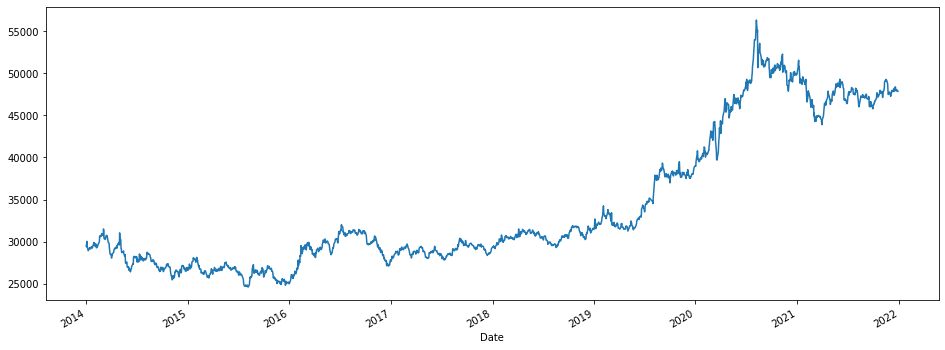

In [ ]:
dataset['Open'].plot(figsize=(16,6))

In [ ]:
# 7 day rolling mean
dataset.rolling(7).mean().head(20)

,Price,Open,High,Low,Volume,Chg%
Date,,,,,,
2014-01-01,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-06,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-07,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-08,29362.142857,29395.571429,29524.428571,29231.285714,10050.000000,-0.258571
2014-01-09,29284.285714,29332.000000,29446.571429,29163.428571,11792.857143,-0.262857
2014-01-10,29169.142857,29239.428571,29324.857143,29060.857143,13602.857143,-0.388571


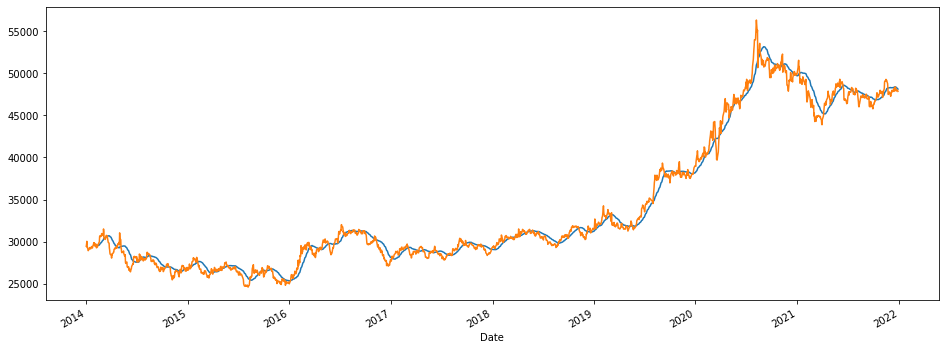

In [ ]:
dataset.rolling(window=30).mean()['High'].plot()
dataset['Open'].plot(figsize=(16,6))

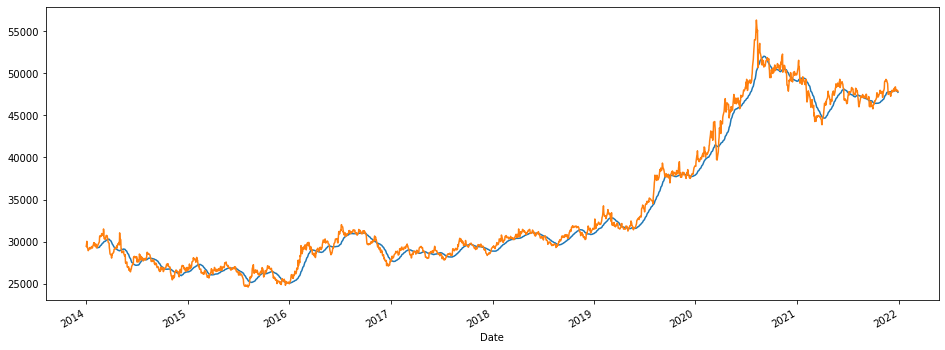

In [ ]:
dataset.rolling(window=30).mean()['Low'].plot()
dataset['Open'].plot(figsize=(16,6))

In [ ]:
training_set=dataset['Open']
training_set=pd.DataFrame(training_set)


In [ ]:
# Importing the training set  
dataset_train = pd.read_csv('Gold Price.csv')  
training_set = dataset_train.iloc[:, 1:2].values  

In [ ]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [ ]:

training_set_scaled


array([[0.15827315],
       [0.17198784],
       [0.16413278],
       ...,
       [0.74078297],
       [0.73935766],
       [0.72754339]])

In [ ]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 2000):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
X_train

array([[[0.15827315],
        [0.17198784],
        [0.16413278],
        ...,
        [0.17037248],
        [0.16802863],
        [0.14687064]],

       [[0.17198784],
        [0.16413278],
        [0.14994299],
        ...,
        [0.16802863],
        [0.14687064],
        [0.14018751]],

       [[0.16413278],
        [0.14994299],
        [0.14487521],
        ...,
        [0.14687064],
        [0.14018751],
        [0.12827822]],

       ...,

       [[0.70176105],
        [0.70353478],
        [0.70556189],
        ...,
        [0.70952109],
        [0.71968833],
        [0.70961612]],

       [[0.70353478],
        [0.70556189],
        [0.69343089],
        ...,
        [0.71968833],
        [0.70961612],
        [0.68335867]],

       [[0.70556189],
        [0.69343089],
        [0.7054352 ],
        ...,
        [0.70961612],
        [0.68335867],
        [0.68034968]]])

In [ ]:
y_train

array([0.14018751, 0.12827822, 0.12593437, ..., 0.68335867, 0.68034968,
       0.68896491])

In [ ]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
# Initialising the RNN
regressor = Sequential()

In [ ]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

In [ ]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
61/61 [==============================] - 14s 113ms/step - loss: 0.0110
Epoch 2/100
61/61 [==============================] - 7s 113ms/step - loss: 0.0028
Epoch 3/100
61/61 [==============================] - 7s 112ms/step - loss: 0.0030
Epoch 4/100
61/61 [==============================] - 7s 113ms/step - loss: 0.0026
Epoch 5/100
61/61 [==============================] - 7s 113ms/step - loss: 0.0023
Epoch 6/100
61/61 [==============================] - 7s 112ms/step - loss: 0.0022
Epoch 7/100
61/61 [==============================] - 7s 114ms/step - loss: 0.0024
Epoch 8/100
61/61 [==============================] - 7s 123ms/step - loss: 0.0020
Epoch 9/100
61/61 [==============================] - 7s 113ms/step - loss: 0.0020
Epoch 10/100
61/61 [==============================] - 7s 114ms/step - loss: 0.0021
Epoch 11/100
61/61 [==============================] - 7s 113ms/step - loss: 0.0019
Epoch 12/100
61/61 [==============================] - 7s 113ms/step - loss: 0.0015
Epoch 13/100

In [ ]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2022
dataset_test = pd.read_csv('Gold Price.csv',index_col="Date",parse_dates=True)

In [ ]:
real_gold_price = dataset_test.iloc[:, 1:2].values

In [ ]:
dataset_test.head()

,Price,Open,High,Low,Volume,Chg%
Date,,,,,,
2014-01-01,29542,29435,29598,29340,2930,0.25
2014-01-02,29975,29678,30050,29678,3140,1.47
2014-01-03,29727,30031,30125,29539,3050,-0.83
2014-01-04,29279,29279,29279,29279,0,-1.51
2014-01-06,29119,29300,29395,29051,24380,-0.55


In [ ]:
dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2072 entries, 2014-01-01 to 2021-12-29
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   2072 non-null   int64  
 1   Open    2072 non-null   int64  
 2   High    2072 non-null   int64  
 3   Low     2072 non-null   int64  
 4   Volume  2072 non-null   int64  
 5   Chg%    2072 non-null   float64
dtypes: float64(1), int64(5)
memory usage: 113.3 KB


In [ ]:
test_set=dataset_test['Open']
test_set=pd.DataFrame(test_set)

In [ ]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2072 entries, 2014-01-01 to 2021-12-29
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Open    2072 non-null   int64
dtypes: int64(1)
memory usage: 32.4 KB


In [ ]:
# Getting the predicted stock price of 2022
dataset_total = pd.concat((dataset['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 2072):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_gold_price = regressor.predict(X_test)
predicted_gold_price = sc.inverse_transform(predicted_gold_price)

In [ ]:
predicted_gold_price

array([[48621.465],
       [44794.293],
       [39812.715],
       ...,
       [46787.32 ],
       [46946.55 ],
       [47125.69 ]], dtype=float32)

In [ ]:
predicted_gold_price=pd.DataFrame(predicted_gold_price)
predicted_gold_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2012 entries, 0 to 2011
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       2012 non-null   float32
dtypes: float32(1)
memory usage: 8.0 KB


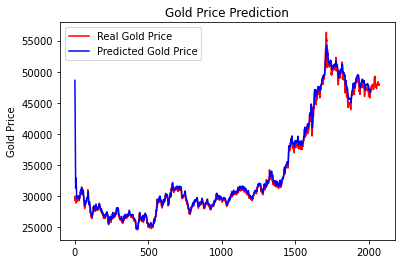

In [ ]:
# Visualising the results
plt.plot(real_gold_price, color = 'red', label = 'Real Gold Price')
plt.plot(predicted_gold_price, color = 'blue', label = 'Predicted Gold Price')
plt.title('Gold Price Prediction')
plt.ylabel('Gold Price')
plt.legend()
plt.show()